# CNN Model Intro com implementação de Fashion MNIST
### Breve introdução
Este notebook cobrirá os seguintes dois tópicos principais:

#### Compreenda os conceitos básicos do modelo CNN
#### Implementar modelo CNN em tempo real usando o conjunto de dados Fashion MNIST

## Compreenda os conceitos básicos do modelo CNN:

A humanidade é uma máquina natural incrível e é capaz de olhar para várias imagens a cada segundo e processá-las sem perceber como o processamento é feito. Mas o mesmo não acontece com as máquinas.

O primeiro passo no processamento de imagens é entender, como representar uma imagem para que a máquina possa lê-la?

Cada imagem é um arranjo cumulativo de pontos (um pixel) organizado em uma ordem especial. Se você alterar a ordem ou a cor de um pixel, a imagem também mudará.

![](https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-07-at-9-15-21-pm.png)




In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
from subprocess import check_output

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam

from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Mounted at /content/drive


chamamos os dados

In [4]:
train_df = pd.read_csv('fashion/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('fashion/fashion-mnist_test.csv', sep = ',')

exploramos os dados

In [5]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Agora observa-se que a primeira coluna são os dados do rótulo e por ter 10 classes, ela terá de 0 a 9. As colunas restantes são os dados de pixel reais. Aqui como você pode ver existem cerca de 784 colunas que contêm dados de pixel.
Aqui, cada linha é uma representação de imagem diferente nos dados de pixel do formulário.

Agora, vamos dividir os dados do trem em matrizes xey, em que x representa os dados da imagem ey representa os rótulos.

Para fazer isso, precisamos converter os dataframes em matrizes numpy do tipo float32, que é a forma aceitável para tensorflow e keras.

In [7]:
train_data = np.array(train_df, dtype = 'float32')

Da mesma forma, vamos fazer o mesmo processo para dados de teste

In [8]:
test_data = np.array(test_df, dtype='float32')

Agora vamos dividir as matrizes de trem em matrizes xey, a saber, x_train, y_train para armazenar todos os dados de imagem e dados de rótulo, respectivamente.
ou seja

- x_train contém todas as linhas e todas as colunas, exceto a coluna do rótulo e excluindo as informações do cabeçalho.
- y_train contém todas as linhas e a primeira coluna, excluindo as informações do cabeçalho.


De forma semelhante, divida as matrizes de teste em matrizes xey, a saber, x_train, y_train para armazenar todos os dados de imagem e dados de rótulo, respectivamente.
ou seja

- x_test contém todas as linhas e todas as colunas, exceto a coluna do rótulo e excluindo as informações do cabeçalho.
- y_test contém todas as linhas e a primeira coluna, excluindo as informações do cabeçalho.

#### Nota importante: Como os dados da imagem em x_train e x_test são de 0 a 255, precisamos redimensionar de 0 para 1. Para fazer isso, precisamos dividir x_train e x_test por 255. É importante que o conjunto de treinamento e o conjunto de teste sejam pré-processados da mesma maneira:

In [9]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

Agora vamos dividir os dados de treinamento em validação e dados de treinamento reais para treinar o modelo e testá-lo usando o conjunto de validação. Isso é obtido usando o método train_test_split da biblioteca de aprendizado do scikit.

In [10]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 1)

Agora vamos visualizar algumas amostras após o redimensionamento dos dados que precisam estar prontos para treinar a rede.


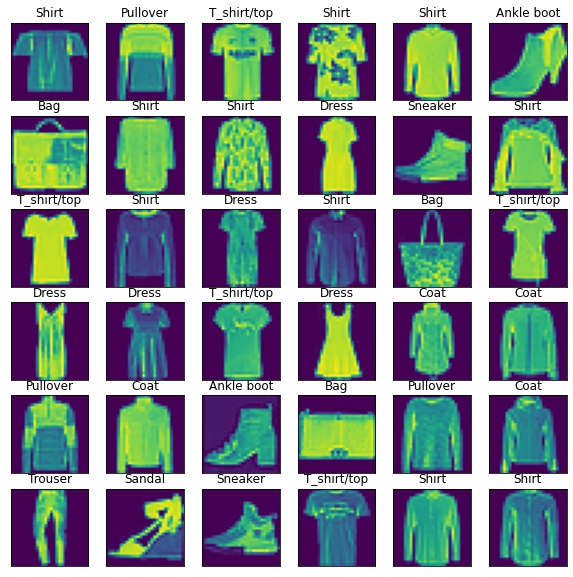

In [11]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

Etiquetas
Cada treinamento e exemplo de teste é atribuído a um dos seguintes rótulos, conforme mostrado abaixo:

* Camiseta 0 / top
* 1 calça
* 2 pulôver
* 3 vestido
* 4 Brasão
* 5 Sandália
* 6 Camisa
* 7 tênis
* 8 Bolsa
* 9 Botins

Acho que a melhor maneira é visualizar os 10 tipos de classes acima para ter uma ideia da aparência desses itens :). Então, vamos visualizar


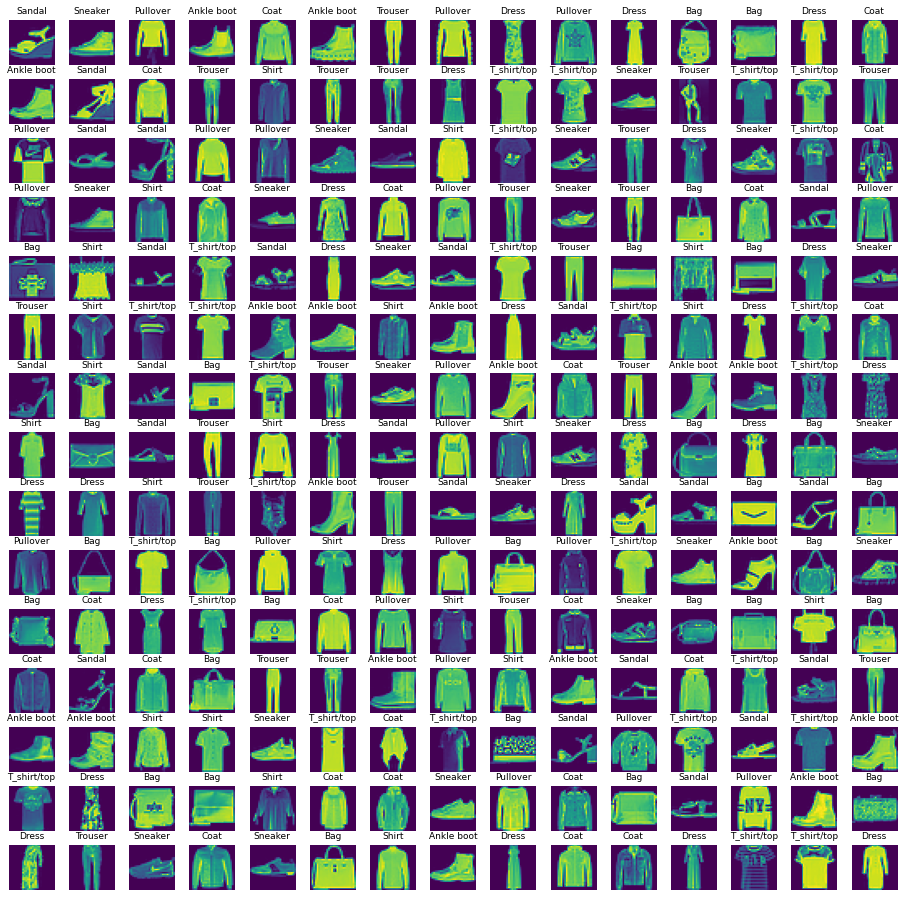

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_data) # obter o comprimento do conjunto de dados do treinamento

# Selecione um número aleatório de 0 a n_train
for i in np.arange(0, W_grid * L_grid): # criar variáveis ​​de espaços uniformes

    # Selecione um número aleatório
    index = np.random.randint(0, n_train)
    # ler e exibir uma imagem com o índice selecionado   
    axes[i].imshow( train_data[index,1:].reshape((28,28)) )
    labelindex = int(train_data[index,0])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

Como você pode observar acima, a forma do sapato da imagem de amostra

### Crie as Redes Neurais Convolucionais (CNN)

#### Definir modelo

#### Compilar o modelo

#### Modelo de treinamento

Em primeiro lugar, vamos definir a forma da imagem antes de definir o modelo. Definiu a forma da imagem como 3D com linhas e colunas e 1 para a visualização 3D

In [13]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) #leembren 3 dimensões para entrar na rede 

Agora precisamos fazer mais formatação dos conjuntos x_train, x_test e validação.

In [14]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

#### Defina o modelo

A primeira camada na rede do modelo, keras.layers.Flatten, transforma o formato das imagens de uma matriz bidimensional (de 28 por 28 pixels) em uma matriz unidimensional (de 28 * 28 = 784 pixels). Essa camada desempilha linhas de pixels na imagem e os alinha e não tem parâmetros para aprender; ele apenas reformata os dados.

Depois que os pixels são achatados, a rede consiste em uma sequência de duas camadas keras.layers.Dense. Estas são camadas neurais densamente conectadas ou totalmente conectadas. A primeira camada Densa tem 32 nós (ou neurônios). A segunda (e última) camada é uma camada softmax de 10 nós que retorna uma matriz de 10 pontuações de probabilidade que somam 1. Cada nó contém uma pontuação que indica a probabilidade de a imagem atual pertencer a uma das 10 classes.

In [15]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# amostragem inferior da saída em vez de 28 * 28 é 14 * 14
    Dropout(0.2),
    Flatten(), # flatten nas camadas para entrar nas dense
    Dense(103,activation='relu'), #leembren o falado no talk ((14*14)+10)/2
    Dense(10,activation = 'softmax')
    
])



#### Compile o modelo

Antes que o modelo esteja pronto para o treinamento, ele precisa de mais algumas configurações. Eles são adicionados durante a etapa de compilação do modelo:

* Função de perda - mede a precisão do modelo durante o treinamento. Você deseja minimizar esta função para "orientar" o modelo na direção certa. Aqui, usaremos "sparse_categorical_crossentropy"
* Otimizador - É assim que o modelo é atualizado com base nos dados que vê e em sua função de perda.
* Métricas - usadas para monitorar as etapas de treinamento e teste. O exemplo a seguir usa precisão, a fração das imagens que são classificadas corretamente.

In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

#### Modelo de treinamento:
O treinamento do modelo de rede neural requer as seguintes etapas:

* Alimente os dados de treinamento para o modelo. Neste exemplo, os dados de treinamento estão nos arrays x_train e y_train.
* O modelo aprende a associar imagens e rótulos.
* Você pede ao modelo para fazer previsões sobre um conjunto de teste - neste exemplo, o array x_test. Verifique se as previsões correspondem aos rótulos da matriz y_test.

Para iniciar o treinamento, chame o método model.fit, assim chamado porque "ajusta" o modelo aos dados de treinamento:

In [17]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

2022-04-12 20:03:07.037155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
12/12 [==============================] - 26s 2s/step - loss: 1.4312 - accuracy: 0.5459 - val_loss: 0.7961 - val_accuracy: 0.7296
Epoch 2/10
12/12 [==============================] - 26s 2s/step - loss: 0.6761 - accuracy: 0.7667 - val_loss: 0.6266 - val_accuracy: 0.7747
Epoch 3/10
12/12 [==============================] - 26s 2s/step - loss: 0.5629 - accuracy: 0.7988 - val_loss: 0.5237 - val_accuracy: 0.8169
Epoch 4/10
12/12 [==============================] - 28s 2s/step - loss: 0.4952 - accuracy: 0.8251 - val_loss: 0.4757 - val_accuracy: 0.8333
Epoch 5/10
12/12 [==============================] - 23s 2s/step - loss: 0.4557 - accuracy: 0.8412 - val_loss: 0.4509 - val_accuracy: 0.8416
Epoch 6/10
12/12 [==============================] - 23s 2s/step - loss: 0.4328 - accuracy: 0.8491 - val_loss: 0.4297 - val_accuracy: 0.8498
Epoch 7/10
12/12 [==============================] - 25s 2s/step - loss: 0.4140 - accuracy: 0.8547 - val_loss: 0.4116 - val_accuracy: 0.8558
Epoch 8/10
12/12 [==

Deixe-nos representar graficamente a Precisão do treinamento versus perda para obter uma melhor compreensão do treinamento do modelo.

Text(0.5, 1.0, 'Train - Accuracy')

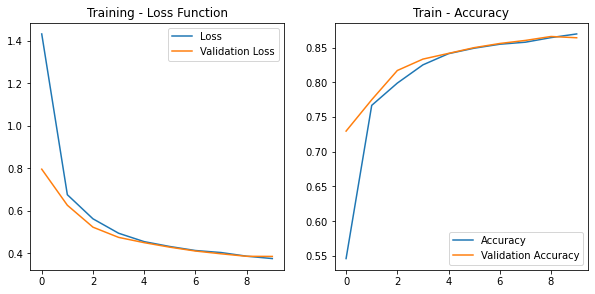

In [18]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')


#### Avaliar / pontuar o modelo

In [19]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.3718
Test Accuracy : 0.8739


### resultados




Vamos traçar a precisão do treinamento e da validação, bem como a perda.

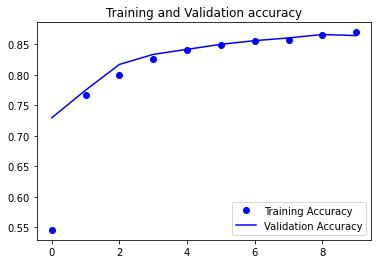

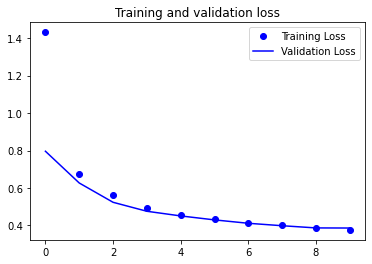

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Relatório de Classificação
Podemos resumir o desempenho do nosso classificador da seguinte forma

In [25]:
#Get the predictions for the test data
#predicted_classes = cnn_model.predict_classes(x_test)
predicted_classes = np.argmax(cnn_model.predict(x_test), axis=-1)
#Get the indices to be plotted
y_true = test_df.iloc[:, 0].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.77      0.89      0.82      1000
     Class 1       0.98      0.97      0.98      1000
     Class 2       0.83      0.77      0.80      1000
     Class 3       0.89      0.91      0.90      1000
     Class 4       0.73      0.90      0.81      1000
     Class 5       0.95      0.94      0.95      1000
     Class 6       0.77      0.51      0.62      1000
     Class 7       0.90      0.95      0.92      1000
     Class 8       0.96      0.97      0.96      1000
     Class 9       0.96      0.93      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [26]:
print(len(predicted_classes))

10000


É evidente que nosso classificador está apresentando baixo desempenho para a classe 6 em termos de precisão e recall. Para a classe 2, o classificador carece ligeiramente de precisão, ao passo que falta um pouco de recall (ou seja, perdido) para a classe 4.

Talvez obtivéssemos mais visão depois de visualizar as previsões corretas e incorretas.

Vamos examinar o rótulo do teste e verificar se é a classificação correta ou não.

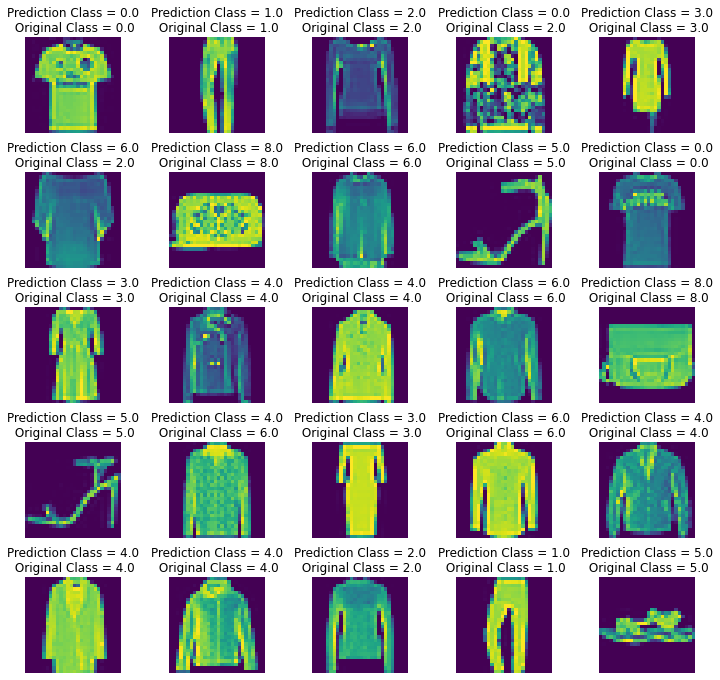

In [27]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)